In [ ]:
import os
import glob

import numpy as np

import matplotlib.pyplot as plt

import grand.dataio.root_trees as rt

import database.tools as tools

#plt.style.use('seaborn-v0_8-colorblind')
plt.style.use('tableau-colorblind10')
plt.style.use('/pbs/home/p/pcorrea/tools/matplotlib_style_sans-serif.txt')

%matplotlib inline

tools.load_logger('debug')

Welcome to JupyROOT 6.30/04


<Logger database.v2.tools (DEBUG)>

In [2]:
SIM_SOFTWARE = 'ZHAireS'
SIM_TAG      = 'DC2.1rc2'
TH1          = 45
TH2          = 35
TQUIET       = 500
TPER         = 1000
TSEPMAX      = 200
NCMIN        = 2#1
NCMAX        = 10#7

CHANNELS_FLT0_STR = 'XY'
MODE_FLT0         = 'OR'

N_SAMPLES  = 1024
N_CHANNELS = 3

PLOT_TITLE = f'T1 = {TH1}, T2 = {TH2}, TQUIET = {TQUIET}, TPER = {TPER}, TSEPMAX = {TSEPMAX}, NCMIN = {NCMIN}, NCMAX = {NCMAX}'
PLOT_SUPTITLE = f'{SIM_SOFTWARE} {SIM_TAG}, {CHANNELS_FLT0_STR} mode {MODE_FLT0}'

PLOT_COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
database_dir    = '/sps/grand/pcorrea/nutrig/database/v2/sig'
database_subdir = os.path.join(database_dir,f'{SIM_SOFTWARE}_{SIM_TAG}_CH_{CHANNELS_FLT0_STR}_MODE_{MODE_FLT0}_TH1_{TH1}_TH2_{TH2}_TQUIET_{TQUIET}_TPER_{TPER}_TSEPMAX_{TSEPMAX}_NCMIN_{NCMIN}_NCMAX_{NCMAX}')

path_metadata_file = os.path.join(database_subdir,'metadata.npz')

database_subdir_filtered = os.path.join(database_subdir,'filtered')
database_subdir_raw      = os.path.join(database_subdir,'raw')

paths_data_files_filtered = sorted( glob.glob( os.path.join(database_subdir_filtered,'*.npz') ) )
paths_data_files_raw      = sorted( glob.glob( os.path.join(database_subdir_raw,'*.npz') ) )

In [4]:
with np.load(path_metadata_file,allow_pickle=True) as metadata_file:
    for key in metadata_file.keys():
        print(f'{key} : {metadata_file[key]}')
    channel_pol = metadata_file['channel_pol'].item()
    channels_flt0 = metadata_file['channels_flt0']
    samples_from_edge = metadata_file['samples_from_edge']

dict_trigger_params : {'th1': 45, 'th2': 35, 't_quiet': 500, 't_period': 1000, 't_sepmax': 200, 'nc_min': 2, 'nc_max': 10}
root_sim_dir : /sps/grand/DC2.1rc2
sim_software : ZHAireS
samples_from_edge : 100
channel_pol : {0: 'X', 1: 'Y', 2: 'Z'}
channels_flt0 : [0 1]
mode_flt0 : OR


In [5]:
path_test_file = paths_data_files_filtered[0]
with np.load(path_test_file) as test_file:
    for key in test_file.keys():
        print(f'{key}')

traces
snr
t_pulse
du_ids
du_seconds
du_nanoseconds
event_number
run_number
du_xyz
primary_type
energy_primary
zenith
azimuth
omega
omega_c
shower_core_pos
xmax_pos_shc
FLT0_flags
FLT0_first_T1_idcs
n_FLT0


In [7]:
traces_filtered = np.zeros((0,N_CHANNELS,N_SAMPLES),dtype=int)
snr             = np.zeros((0,))

for path_data_file_filtered in paths_data_files_filtered[:]:
    with np.load(path_data_file_filtered) as data_file_filtered:
        traces_filtered = np.vstack( ( traces_filtered,data_file_filtered['traces'] ) )
        snr             = np.hstack( ( snr,data_file_filtered['snr'] ))
        

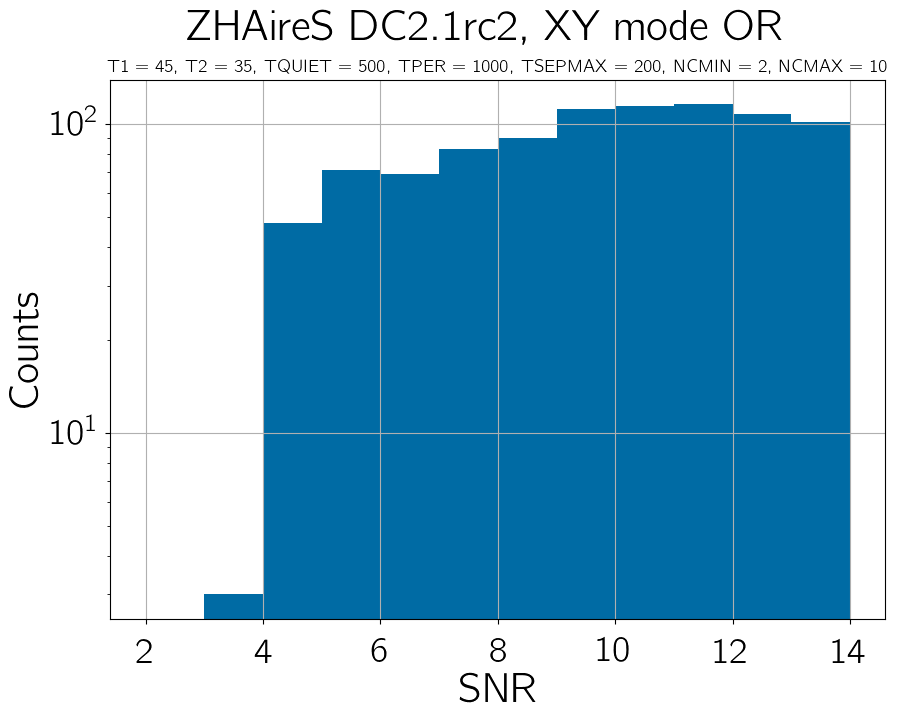

In [8]:
fig, ax = plt.subplots()

ax.hist(snr,bins=np.linspace(2,14,13))

ax.set_xlabel('SNR')
ax.set_ylabel('Counts')

ax.set_title(PLOT_TITLE,fontsize=13)
plt.suptitle(PLOT_SUPTITLE)

ax.set_yscale('log')

plt.show()

In [63]:
traces_filtered.dtype

dtype('float64')